In [51]:
import pyodbc 
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt  # Librería de gráficos de python
import seaborn as sns            # Librería de gráficos (complemento)
sns.set()

import datetime

import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


#### SQL READ 

In [2]:
#### CONEXION SQL 
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                       "Server=10.30.4.91;"
                       "Database=NMPriesg_cred;"
                        "uid=srvsqlcrdprod;pwd=Phyt.983.Tab")

In [3]:
df1 = pd.read_sql_query('select * from DB_MA_1_MCO ', cnxn)
df1.head(5)

,KEY_1,NUM_CLIENTE,CONTRATO,Folio_consulta_bis,ID_CONSULTA,VINTAGE,MOB,PROD_FAMILIA,SUB_PRODUCTO,FEC_SOL,...,TOT_IQ_PL,IQ_1M_PL,IQ_3M_PL,IQ_6M_PL,IQ_9M_PL,IQ_12M_PL,IQ_18M_PL,IQ_24M_PL,FLAG_2PV_9,FLAG_2PV_12
0,1000057_700088465,1000057.0,700088465,1.570191e+09,140457.0,2018-05-29,19,OMEGA,1,2018-05-28,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,1000083_400091775,1000083.0,400091775,1.319633e+09,158062.0,2017-02-18,34,OMEGA,1,2017-02-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,1000171_700104334,1000171.0,700104334,1.621236e+09,167590.0,2018-07-31,17,OMEGA,1,2018-07-26,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0
3,1000197_700091999,1000197.0,700091999,2.008158e+09,296677.0,2018-06-11,18,OMEGA,1,2018-06-09,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,1000213_700075839,1000213.0,700075839,1.530431e+09,119651.0,2018-04-10,20,OMEGA,1,2018-04-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [52]:
df1 = pd.read_csv('C:/Users/esolisbus/Desktop/FMP/Mercado Abierto/Datos/Reconstruccion/BD_datosBUROact.csv', encoding= 'latin1')

In [53]:
df1['year_test'] = pd.DatetimeIndex(df1['VINTAGE']).year
df1 = df1[df1.year_test <= 2018]

df1.year_test.value_counts(normalize = True )

Series([], Name: year_test, dtype: float64)

## thin file 

In [54]:
df2 =  df1[df1.SEGMENTO == 'TF'].copy()

In [55]:
list(df2.columns)

['KEY_1',
 'NUM_CLIENTE',
 'CONTRATO',
 'Folio_consulta_bis',
 'ID_CONSULTA',
 'VINTAGE',
 'MOB',
 'PROD_FAMILIA',
 'SUB_PRODUCTO',
 'FEC_SOL',
 'FEC_CONS',
 'SEGMENTO',
 'EDAD',
 'EstadoCivil',
 'Escolaridad',
 'RS_GENERONAME',
 'OCUPACION',
 'OPEN_ACC_MOP2M',
 'OPEN_ACC_MOP3M',
 'OPEN_ACC_MOP5M',
 'OPEN_ACC_MOP9M',
 'OPEN_ACC_MOP2M_I',
 'OPEN_ACC_MOP3M_I',
 'OPEN_ACC_MOP5M_I',
 'OPEN_ACC_MOP9M_I',
 'OPEN_ACC_MOP2M_R',
 'OPEN_ACC_MOP3M_R',
 'OPEN_ACC_MOP5M_R',
 'OPEN_ACC_MOP9M_R',
 'OPEN_ACC_MOP2',
 'OPEN_ACC_MOP3',
 'OPEN_ACC_MOP5',
 'OPEN_ACC_MOP7',
 'OPEN_ACC_MOP2_I',
 'OPEN_ACC_MOP3_I',
 'OPEN_ACC_MOP5_I',
 'OPEN_ACC_MOP7_I',
 'OPEN_ACC_MOP2_R',
 'OPEN_ACC_MOP3_R',
 'OPEN_ACC_MOP5_R',
 'OPEN_ACC_MOP7_R',
 'ACC_MOP2M',
 'ACC_MOP3M',
 'ACC_MOP5M',
 'ACC_MOP9M',
 'ACC_MOP2M_I',
 'ACC_MOP3M_I',
 'ACC_MOP5M_I',
 'ACC_MOP9M_I',
 'ACC_MOP2M_R',
 'ACC_MOP3M_R',
 'ACC_MOP5M_R',
 'ACC_MOP9M_R',
 'ACC_MOP2',
 'ACC_MOP3',
 'ACC_MOP5',
 'ACC_MOP7',
 'ACC_MOP2_I',
 'ACC_MOP3_I',
 'ACC_MOP5_I',


In [56]:
print(len(df2))
df2.shape[0]


0


0

##### missings

In [57]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [58]:
df2.isnull().sum()

KEY_1                   0
NUM_CLIENTE             0
CONTRATO                0
Folio_consulta_bis      0
ID_CONSULTA             0
VINTAGE                 0
MOB                     0
PROD_FAMILIA            0
SUB_PRODUCTO            0
FEC_SOL                 0
FEC_CONS                0
SEGMENTO                0
EDAD                    0
EstadoCivil             0
Escolaridad             0
RS_GENERONAME           0
OCUPACION               0
OPEN_ACC_MOP2M          0
OPEN_ACC_MOP3M          0
OPEN_ACC_MOP5M          0
OPEN_ACC_MOP9M          0
OPEN_ACC_MOP2M_I        0
OPEN_ACC_MOP3M_I        0
OPEN_ACC_MOP5M_I        0
OPEN_ACC_MOP9M_I        0
OPEN_ACC_MOP2M_R        0
OPEN_ACC_MOP3M_R        0
OPEN_ACC_MOP5M_R        0
OPEN_ACC_MOP9M_R        0
OPEN_ACC_MOP2           0
OPEN_ACC_MOP3           0
OPEN_ACC_MOP5           0
OPEN_ACC_MOP7           0
OPEN_ACC_MOP2_I         0
OPEN_ACC_MOP3_I         0
OPEN_ACC_MOP5_I         0
OPEN_ACC_MOP7_I         0
OPEN_ACC_MOP2_R         0
OPEN_ACC_MOP

In [59]:
na_ = pd.DataFrame(df2.isna().sum())
na_.reset_index(inplace=True)
na_.rename(columns = {'index' : 'desc'} , inplace = True)
na_[na_[0] > 0]

# na_.to_csv('nas.csv')

,desc,0


In [60]:


df2.replace({'EstadoCivil':{'VIUDO'       : 'OTRO'          
                           ,'DIVORCIADO'  : 'OTRO'     
                           ,'NINGUNO'     : 'OTRO'
                           , np.nan       : 'OTRO'
                           ,}}, inplace = True )

df2.replace({'Escolaridad':{'PROFESIONAL': 'SUPERIOR+'          
                           ,'MAESTRÍA'   : 'SUPERIOR+'     
                           ,'DOCTORADO'  : 'SUPERIOR+'
                           , np.nan      : 'NINGUNO'
                           ,}}, inplace = True )
df2.dropna(subset=['RS_GENERONAME'] , inplace = True)


In [61]:
df2.drop(['KEY_1',
'NUM_CLIENTE',
'CONTRATO',
'Folio_consulta_bis',
'ID_CONSULTA',
'VINTAGE',
'MOB',
'PROD_FAMILIA',
'SUB_PRODUCTO',
'FEC_SOL',
'FEC_CONS',
'SEGMENTO'] , axis = 1 , inplace = True )

In [62]:
df2.fillna(0, inplace = True)

,EDAD,EstadoCivil,Escolaridad,RS_GENERONAME,OCUPACION,OPEN_ACC_MOP2M,OPEN_ACC_MOP3M,OPEN_ACC_MOP5M,OPEN_ACC_MOP9M,OPEN_ACC_MOP2M_I,OPEN_ACC_MOP3M_I,OPEN_ACC_MOP5M_I,OPEN_ACC_MOP9M_I,OPEN_ACC_MOP2M_R,OPEN_ACC_MOP3M_R,OPEN_ACC_MOP5M_R,OPEN_ACC_MOP9M_R,OPEN_ACC_MOP2,OPEN_ACC_MOP3,OPEN_ACC_MOP5,OPEN_ACC_MOP7,OPEN_ACC_MOP2_I,OPEN_ACC_MOP3_I,OPEN_ACC_MOP5_I,OPEN_ACC_MOP7_I,OPEN_ACC_MOP2_R,OPEN_ACC_MOP3_R,OPEN_ACC_MOP5_R,OPEN_ACC_MOP7_R,ACC_MOP2M,ACC_MOP3M,ACC_MOP5M,ACC_MOP9M,ACC_MOP2M_I,ACC_MOP3M_I,ACC_MOP5M_I,ACC_MOP9M_I,ACC_MOP2M_R,ACC_MOP3M_R,ACC_MOP5M_R,ACC_MOP9M_R,ACC_MOP2,ACC_MOP3,ACC_MOP5,ACC_MOP7,ACC_MOP2_I,ACC_MOP3_I,ACC_MOP5_I,ACC_MOP7_I,ACC_MOP2_R,ACC_MOP3_R,ACC_MOP5_R,ACC_MOP7_R,SUM_OPEN_BAL_MOP2M,SUM_OPEN_BAL_MOP3M,SUM_OPEN_BAL_MOP5M,SUM_OPEN_BAL_MOP9M,SUM_OPEN_BAL_MOP2M_I,SUM_OPEN_BAL_MOP3M_I,SUM_OPEN_BAL_MOP5M_I,SUM_OPEN_BAL_MOP9M_I,SUM_OPEN_BAL_MOP2M_R,SUM_OPEN_BAL_MOP3M_R,SUM_OPEN_BAL_MOP5M_R,SUM_OPEN_BAL_MOP9M_R,SUM_BAL_MOP2M,SUM_BAL_MOP3M,SUM_BAL_MOP5M,SUM_BAL_MOP9M,SUM_BAL_MOP2M_I,SUM_BAL_MOP3M_I,SUM_BAL_MOP5M_I,SUM_BAL_MOP9M_I,SUM_BAL_MOP2M_R,SUM_BAL_MOP3M_R,SUM_BAL_MOP5M_R,SUM_BAL_MOP9M_R,MAX_OPEN_BAL_MOP2M,MAX_OPEN_BAL_MOP3M,MAX_OPEN_BAL_MOP5M,MAX_OPEN_BAL_MOP9M,MAX_OPEN_BAL_MOP2M_I,MAX_OPEN_BAL_MOP3M_I,MAX_OPEN_BAL_MOP5M_I,MAX_OPEN_BAL_MOP9M_I,MAX_OPEN_BAL_MOP2M_R,MAX_OPEN_BAL_MOP3M_R,MAX_OPEN_BAL_MOP5M_R,MAX_OPEN_BAL_MOP9M_R,MAX_BAL_MOP2M,MAX_BAL_MOP3M,MAX_BAL_MOP5M,MAX_BAL_MOP9M,MAX_BAL_MOP2M_I,MAX_BAL_MOP3M_I,MAX_BAL_MOP5M_I,MAX_BAL_MOP9M_I,MAX_BAL_MOP2M_R,MAX_BAL_MOP3M_R,MAX_BAL_MOP5M_R,MAX_BAL_MOP9M_R,OPEN_ACC_ACT,OPEN_ACC_ACT_R,OPEN_ACC_ACT_I,OPEN_ACC_ACT_CC,OPEN_ACC_ACT_PL,OPEN_ACC_3M,OPEN_ACC_6M,OPEN_ACC_12M,OPEN_ACC_24M,OPEN_ACC_3M_I,OPEN_ACC_6M_I,OPEN_ACC_12M_I,OPEN_ACC_24M_I,OPEN_ACC_3M_R,OPEN_ACC_6M_R,OPEN_ACC_12M_R,OPEN_ACC_24M_R,SUM_CUR_BAL_OPN_ALL,SUM_CUR_BAL_OPN_I,SUM_CUR_BAL_OPN_R,SUM_CUR_BAL_OPN_PL,SUM_CUR_BAL_OPN_CC,MAX_CUR_BAL_OPN_ALL,MAX_CUR_BAL_OPN_I,MAX_CUR_BAL_OPN_R,MAX_CUR_BAL_OPN_PL,MAX_CUR_BAL_OPN_CC,SUM_DUE_BAL_OPN_ALL,SUM_DUE_BAL_OPN_I,SUM_DUE_BAL_OPN_R,SUM_DUE_BAL_OPN_PL,SUM_DUE_BAL_OPN_CC,MAX_DUE_BAL_OPN_ALL,MAX_DUE_BAL_OPN_I,MAX_DUE_BAL_OPN_R,MAX_DUE_BAL_OPN_PL,MAX_DUE_BAL_OPN_CC,MAX_ANT_ACC_ALL,MAX_ANT_ACC_R,MAX_ANT_ACC_I,MAX_ANT_ACC_CC,MAX_ANT_ACC_PL,MAX_CL_R,MAX_CL_I,MAX_CL_CC,MAX_CL_PL,MAX_OPEN_CL_R,MAX_OPEN_CL_I,MAX_OPEN_CL_CC,MAX_OPEN_CL_PL,SUM_CL_R,SUM_CL_I,SUM_CL_CC,SUM_CL_PL,SUM_OPEN_CL_R,SUM_OPEN_CL_I,SUM_OPEN_CL_CC,SUM_OPEN_CL_PL,MAX_UTIL_R,MAX_UTIL_CC,MAX_UTIL_OPEN_R,MAX_UTIL_OPEN_CC,TOT_UTIL_OPEN_R,TOT_UTIL_OPEN_CC,MAX_MOP_HIST,MAX_MOP_HIST_R,MAX_MOP_HIST_I,MAX_MOP_HIST_CC,MAX_MOP_HIST_PL,OPN_MAX_MOP_HIST,OPN_MAX_MOP_HIST_R,OPN_MAX_MOP_HIST_I,OPN_MAX_MOP_HIST_CC,OPN_MAX_MOP_HIST_PL,MAX_MOP_3M,MAX_MOP_6M,MAX_MOP_12M,MAX_MOP_18M,MAX_MOP_24M,MAX_MOP_3M_OPN,MAX_MOP_6M_OPN,MAX_MOP_12M_OPN,MAX_MOP_18M_OPN,MAX_MOP_24M_OPN,MAX_MOP_3M_R,MAX_MOP_6M_R,MAX_MOP_12M_R,MAX_MOP_18M_R,MAX_MOP_24M_R,MAX_MOP_3M_I,MAX_MOP_6M_I,MAX_MOP_12M_I,MAX_MOP_18M_I,MAX_MOP_24M_I,MAX_MOP_3M_CC,MAX_MOP_6M_CC,MAX_MOP_12M_CC,MAX_MOP_18M_CC,MAX_MOP_24M_CC,MAX_MOP_3M_CL,MAX_MOP_6M_CL,MAX_MOP_12M_CL,MAX_MOP_18M_CL,MAX_MOP_24M_CL,MAX_MOP_3M_R_OPN,MAX_MOP_6M_R_OPN,MAX_MOP_12M_R_OPN,MAX_MOP_18M_R_OPN,MAX_MOP_24M_R_OPN,MAX_MOP_3M_I_OPN,MAX_MOP_6M_I_OPN,MAX_MOP_12M_I_OPN,MAX_MOP_18M_I_OPN,MAX_MOP_24M_I_OPN,MAX_MOP_3M_CC_OPN,MAX_MOP_6M_CC_OPN,MAX_MOP_12M_CC_OPN,MAX_MOP_18M_CC_OPN,MAX_MOP_24M_CC_OPN,MAX_MOP_3M_CL_OPN,MAX_MOP_6M_CL_OPN,MAX_MOP_12M_CL_OPN,MAX_MOP_18M_CL_OPN,MAX_MOP_24M_CL_OPN,MAX_RATIO_PAYMENT_CL,TOT_RATIO_PAYMENT_CL,TOT_IQ,IQ_1M,IQ_3M,IQ_6M,IQ_9M,IQ_12M,IQ_18M,IQ_24M,TOT_IQ_BANK,IQ_1M_BANK,IQ_3M_BANK,IQ_6M_BANK,IQ_9M_BANK,IQ_12M_BANK,IQ_18M_BANK,IQ_24M_BANK,TOT_IQ_CC,IQ_1M_CC,IQ_3M_CC,IQ_6M_CC,IQ_9M_CC,IQ_12M_CC,IQ_18M_CC,IQ_24M_CC,TOT_IQ_PL,IQ_1M_PL,IQ_3M_PL,IQ_6M_PL,IQ_9M_PL,IQ_12M_PL,IQ_18M_PL,IQ_24M_PL,FLAG_2PV_9,FLAG_2PV_12,year_test


In [63]:

EC=df2.EstadoCivil.value_counts(normalize = True)
print(EC)
EE=df2.Escolaridad.value_counts(normalize = True)
print(EE)
EG=df2.RS_GENERONAME.value_counts(normalize = True)
print(EG)

Series([], Name: EstadoCivil, dtype: float64)
Series([], Name: Escolaridad, dtype: float64)
Series([], Name: RS_GENERONAME, dtype: float64)


In [64]:
df3 =  df2.copy()

In [65]:
df3['MAX_MOP_3M'] = df3.MAX_MOP_3M.astype(int)
df3['MAX_MOP_6M'] = df3.MAX_MOP_6M.astype(int)
df3['MAX_MOP_12M'] = df3.MAX_MOP_12M.astype(int)
df3['MAX_MOP_18M'] = df3.MAX_MOP_18M.astype(int)
df3['MAX_MOP_24M'] = df3.MAX_MOP_24M.astype(int)
df3['MAX_MOP_3M_OPN'] = df3.MAX_MOP_3M_OPN.astype(int)
df3['MAX_MOP_6M_OPN'] = df3.MAX_MOP_6M_OPN.astype(int)
df3['MAX_MOP_12M_OPN'] = df3.MAX_MOP_12M_OPN.astype(int)
df3['MAX_MOP_18M_OPN'] = df3.MAX_MOP_18M_OPN.astype(int)
df3['MAX_MOP_24M_OPN'] = df3.MAX_MOP_24M_OPN.astype(int)
df3['MAX_MOP_3M_R'] = df3.MAX_MOP_3M_R.astype(int)
df3['MAX_MOP_6M_R'] = df3.MAX_MOP_6M_R.astype(int)
df3['MAX_MOP_12M_R'] = df3.MAX_MOP_12M_R.astype(int)
df3['MAX_MOP_18M_R'] = df3.MAX_MOP_18M_R.astype(int)
df3['MAX_MOP_24M_R'] = df3.MAX_MOP_24M_R.astype(int)
df3['MAX_MOP_3M_I'] = df3.MAX_MOP_3M_I.astype(int)
df3['MAX_MOP_6M_I'] = df3.MAX_MOP_6M_I.astype(int)
df3['MAX_MOP_12M_I'] = df3.MAX_MOP_12M_I.astype(int)
df3['MAX_MOP_18M_I'] = df3.MAX_MOP_18M_I.astype(int)
df3['MAX_MOP_24M_I'] = df3.MAX_MOP_24M_I.astype(int)
df3['MAX_MOP_3M_CC'] = df3.MAX_MOP_3M_CC.astype(int)
df3['MAX_MOP_6M_CC'] = df3.MAX_MOP_6M_CC.astype(int)
df3['MAX_MOP_12M_CC'] = df3.MAX_MOP_12M_CC.astype(int)
df3['MAX_MOP_18M_CC'] = df3.MAX_MOP_18M_CC.astype(int)
df3['MAX_MOP_24M_CC'] = df3.MAX_MOP_24M_CC.astype(int)
df3['MAX_MOP_3M_CL'] = df3.MAX_MOP_3M_CL.astype(int)
df3['MAX_MOP_6M_CL'] = df3.MAX_MOP_6M_CL.astype(int)
df3['MAX_MOP_12M_CL'] = df3.MAX_MOP_12M_CL.astype(int)
df3['MAX_MOP_18M_CL'] = df3.MAX_MOP_18M_CL.astype(int)
df3['MAX_MOP_24M_CL'] = df3.MAX_MOP_24M_CL.astype(int)
df3['MAX_MOP_6M_R_OPN'] = df3.MAX_MOP_6M_R_OPN.astype(int)
df3['MAX_MOP_12M_R_OPN'] = df3.MAX_MOP_12M_R_OPN.astype(int)
df3['MAX_MOP_18M_R_OPN'] = df3.MAX_MOP_18M_R_OPN.astype(int)
df3['MAX_MOP_24M_R_OPN'] = df3.MAX_MOP_24M_R_OPN.astype(int)
df3['MAX_MOP_3M_I_OPN'] = df3.MAX_MOP_3M_I_OPN.astype(int)
df3['MAX_MOP_6M_I_OPN'] = df3.MAX_MOP_6M_I_OPN.astype(int)
df3['MAX_MOP_12M_I_OPN'] = df3.MAX_MOP_12M_I_OPN.astype(int)
df3['MAX_MOP_18M_I_OPN'] = df3.MAX_MOP_18M_I_OPN.astype(int)
df3['MAX_MOP_24M_I_OPN'] = df3.MAX_MOP_24M_I_OPN.astype(int)
df3['MAX_MOP_3M_CC_OPN'] = df3.MAX_MOP_3M_CC_OPN.astype(int)
df3['MAX_MOP_6M_CC_OPN'] = df3.MAX_MOP_6M_CC_OPN.astype(int)
df3['MAX_MOP_12M_CC_OPN'] = df3.MAX_MOP_12M_CC_OPN.astype(int)
df3['MAX_MOP_18M_CC_OPN'] = df3.MAX_MOP_18M_CC_OPN.astype(int)
df3['MAX_MOP_24M_CC_OPN'] = df3.MAX_MOP_24M_CC_OPN.astype(int)
df3['MAX_MOP_3M_R_OPN'] = df3.MAX_MOP_3M_CC_OPN.astype(int)
df3['MAX_MOP_3M_CL_OPN'] = df3.MAX_MOP_6M_CC_OPN.astype(int)
df3['MAX_MOP_6M_CL_OPN'] = df3.MAX_MOP_12M_CC_OPN.astype(int)
df3['MAX_MOP_12M_CL_OPN'] = df3.MAX_MOP_18M_CC_OPN.astype(int)
df3['MAX_MOP_18M_CL_OPN'] = df3.MAX_MOP_24M_CC_OPN.astype(int)
df3['MAX_MOP_24M_CL_OPN'] = df3.MAX_MOP_24M_CC_OPN.astype(int)



In [66]:
list(df3.dtypes)

[dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')

### Correlation

In [67]:
df3.corr()
df3.corr().to_csv('corr_1.csv')

In [68]:
del_vect = [
'IQ_24M_PL'
,'IQ_9M_PL'
,'IQ_12M_PL'
,'IQ_18M_PL'
,'IQ_9M_BANK'
,'IQ_12M_BANK'
,'IQ_18M_BANK'
,'IQ_24M_BANK'
,'IQ_6M'
,'IQ_9M'
,'IQ_12M'
,'IQ_18M'
,'IQ_24M'
,'IQ_6M_CC'
,'IQ_9M_CC'
,'IQ_12M_CC'
,'IQ_18M_CC'
,'IQ_24M_CC'
,'MAX_RATIO_PAYMENT_CL'
,'MAX_UTIL_CC'
,'TOT_UTIL_OPEN_R'
,'SUM_OPEN_CL_I'
,'SUM_CL_I'
,'SUM_CL_R'
,'SUM_CL_I'
,'MAX_ANT_ACC_I'
,'MAX_ANT_ACC_CC'
,'MAX_DUE_BAL_OPN_CC'
,'MAX_DUE_BAL_OPN_I'
,'MAX_DUE_BAL_OPN_ALL'
,'MAX_DUE_BAL_OPN_PL'
,'MAX_DUE_BAL_OPN_R'
,'MAX_CUR_BAL_OPN_R'
,'MAX_CUR_BAL_OPN_PL'
,'MAX_CUR_BAL_OPN_CC'  
,'ACC_MOP5_I'
,'OPEN_ACC_MOP7_R'
,'MAX_OPEN_BAL_MOP9M_I'
,'OPEN_ACC_MOP5_I'
,'OPEN_ACC_MOP9M_I'
,'OPEN_ACC_MOP5_I'
,'SUM_OPEN_BAL_MOP9M_I'
,'ACC_MOP5_R'
,'MAX_OPEN_BAL_MOP9M_R'
,'OPEN_ACC_MOP7'
,'OPEN_ACC_MOP5_R'
,'ACC_MOP7_I'
,'MAX_OPEN_BAL_MOP5M_R'
,'OPEN_ACC_MOP3_R'
,'SUM_OPEN_BAL_MOP9M'
,'SUM_BAL_MOP9M_R'
,'OPEN_ACC_MOP3M_I'
,'OPEN_ACC_MOP5M'
,'OPEN_ACC_MOP3M_R'
,'MAX_OPEN_BAL_MOP9M'
,'ACC_MOP7'
,'SUM_OPEN_BAL_MOP3M_R'
,'MAX_OPEN_BAL_MOP5M'
,'OPEN_ACC_MOP3'
,'SUM_OPEN_BAL_MOP5M'
,'OPEN_ACC_MOP3'
,'SUM_OPEN_BAL_MOP5M'
,'MAX_OPEN_BAL_MOP5M_I'
,'ACC_MOP9M_I'
,'ACC_MOP3_R'
,'MAX_BAL_MOP5M_R'
,'OPEN_ACC_MOP3_I'
,'SUM_OPEN_BAL_MOP5M_R'
,'SUM_BAL_MOP5M_R'
,'OPEN_ACC_MOP3M_I'
,'OPEN_ACC_MOP5M'
,'OPEN_ACC_MOP3M_R'      
,'ACC_MOP5_I'
,'OPEN_ACC_MOP7_R'
,'MAX_OPEN_BAL_MOP9M_I'
,'ACC_MOP5_R'  
,'MAX_MOP_3M'
,'MAX_MOP_12M'
,'MAX_MOP_18M'
,'MAX_MOP_6M_OPN'
,'MAX_MOP_12M_OPN'
,'MAX_MOP_18M_OPN'
,'MAX_MOP_24M_OPN'
,'MAX_MOP_6M_R'
,'MAX_MOP_12M_R'
,'MAX_MOP_18M_R'
,'MAX_MOP_24M_R'
,'MAX_MOP_18M_I'
,'MAX_MOP_24M_I'
,'MAX_MOP_3M_CL'
,'MAX_MOP_24M_CL'
,'MAX_MOP_12M_CC'
,'MAX_MOP_18M_CC'
,'MAX_MOP_24M_CC'
,'MAX_MOP_12M_CL'
,'MAX_MOP_18M_CL'
,'MAX_MOP_24M_CL'
,'MAX_MOP_12M_R_OPN'
,'MAX_MOP_18M_R_OPN'
,'MAX_MOP_24M_R_OPN'
,'MAX_MOP_12M_I_OPN'
,'MAX_MOP_18M_I_OPN'
,'MAX_MOP_24M_I_OPN'
,'MAX_MOP_12M_CC_OPN'
,'MAX_MOP_18M_CC_OPN'
,'MAX_MOP_24M_CC_OPN'
,'MAX_MOP_12M_CL_OPN'
,'MAX_MOP_18M_CL_OPN'
,'MAX_MOP_24M_CL_OPN'
,'TOT_IQ_BANK'
,'TOT_IQ_CC'
,'IQ_1M'
,'IQ_3M_CC'
,'IQ_6M_PL'
,'ACC_MOP5M'
,'ACC_MOP2M'
,'ACC_MOP5M_I'
,'ACC_MOP3M_R'
,'ACC_MOP5M_R'
,'ACC_MOP2'
,'OPEN_ACC_MOP5'
,'SUM_OPEN_BAL_MOP2M_I'
,'SUM_BAL_MOP2M'
,'SUM_BAL_MOP2M_I'
,'MAX_OPEN_BAL_MOP2M'
,'MAX_BAL_MOP2M'
,'MAX_BAL_MOP2M_I'
,'SUM_BAL_MOP2M_R'
,'SUM_BAL_MOP5M_I'
,'SUM_BAL_MOP3M_I'
,'SUM_BAL_MOP3M_R'
,'MAX_OPEN_BAL_MOP3M'
,'MAX_BAL_MOP3M'
,'MAX_BAL_MOP5M'
,'MAX_BAL_MOP9M'
,'MAX_BAL_MOP5M_I'
,'MAX_BAL_MOP3M_I'
,'MAX_CUR_BAL_OPN_ALL'
,'MAX_CUR_BAL_OPN_I'
,'IQ_3M'
,'IQ_6M_BANK'
,'IQ_1M_BANK'
,'OPN_MAX_MOP_HIST_I'
,'OPN_MAX_MOP_HIST_R'
,'OPN_MAX_MOP_HIST_I'
,'OPN_MAX_MOP_HIST'
,'MAX_MOP_HIST_PL'
,'MAX_MOP_HIST'
,'OPN_MAX_MOP_HIST'
,'TOT_UTIL_OPEN_CC'
,'MAX_UTIL_R'
,'MAX_UTIL_OPEN_CC'
,'TOT_UTIL_OPEN_CC'
,'MAX_OPEN_CL_PL'
,'SUM_CL_CC'
,'MAX_OPEN_CL_R'
,'OPEN_ACC_MOP5M_R'
,'ACC_MOP2M_I'
,'ACC_MOP2M_R'
,'ACC_MOP2_I'
,'MAX_OPEN_BAL_MOP2M_I'
,'SUM_OPEN_BAL_MOP3M'
,'MAX_OPEN_BAL_MOP3M_I'
,'MAX_BAL_MOP2M_R'
,'SUM_BAL_MOP5M'
,'SUM_BAL_MOP9M'
,'MAX_BAL_MOP9M_I'
,'MAX_BAL_MOP9M_I'
,'MAX_BAL_MOP2M_R'
,'OPEN_ACC_ACT_I'
,'OPEN_ACC_ACT_CC'
,'OPEN_ACC_24M_I'
,'OPEN_ACC_12M_I'
,'OPEN_ACC_12M_R'
,'OPEN_ACC_24M_R'
,'SUM_CUR_BAL_OPN_I'
,'SUM_DUE_BAL_OPN_I'
,'MAX_CL_I'
,'MAX_CL_CC'
,'MAX_OPEN_CL_R'
,'MAX_CL_I'
,'MAX_CL_CC'
,'MAX_OPEN_CL_CC'
,'SUM_CL_CC'
,'MAX_UTIL_R'
,'MAX_UTIL_OPEN_CC'
]


df3.drop(del_vect , axis = 1 , inplace = True )

### copia en R

In [69]:
df3.to_csv('df_ma_clean_mco_1.csv')


# importance feature

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [32]:
# df_if = df2.copy()

df4 = df3.copy()

In [33]:
df4.drop(['FLAG_2PV_9'
,'FLAG_2PV_12'
,'year_test'
] , axis = 1 , inplace = True )

##### get dummies

In [34]:
df5 = pd.get_dummies(df4).copy()

In [35]:
X = df5.copy()
y = df3[['FLAG_2PV_9']].copy()

In [229]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

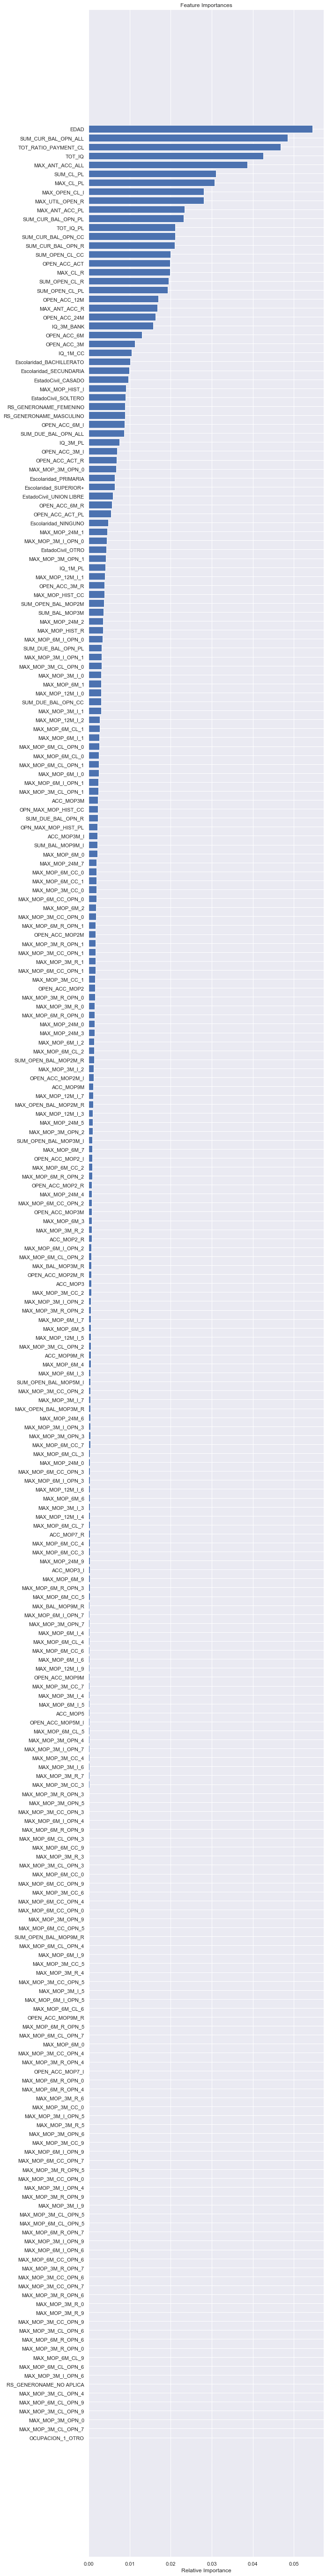

In [225]:
features = X.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (9,100))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## modeling

In [275]:
df3.columns

Index(['EDAD', 'EstadoCivil', 'Escolaridad', 'RS_GENERONAME', 'OCUPACION',
       'OPEN_ACC_MOP2M', 'OPEN_ACC_MOP3M', 'OPEN_ACC_MOP9M',
       'OPEN_ACC_MOP2M_I', 'OPEN_ACC_MOP5M_I', 'OPEN_ACC_MOP2M_R',
       'OPEN_ACC_MOP9M_R', 'OPEN_ACC_MOP2', 'OPEN_ACC_MOP2_I',
       'OPEN_ACC_MOP7_I', 'OPEN_ACC_MOP2_R', 'ACC_MOP3M', 'ACC_MOP9M',
       'ACC_MOP3M_I', 'ACC_MOP9M_R', 'ACC_MOP3', 'ACC_MOP5', 'ACC_MOP3_I',
       'ACC_MOP2_R', 'ACC_MOP7_R', 'SUM_OPEN_BAL_MOP2M',
       'SUM_OPEN_BAL_MOP3M_I', 'SUM_OPEN_BAL_MOP5M_I', 'SUM_OPEN_BAL_MOP2M_R',
       'SUM_OPEN_BAL_MOP9M_R', 'SUM_BAL_MOP3M', 'SUM_BAL_MOP9M_I',
       'MAX_OPEN_BAL_MOP2M_R', 'MAX_OPEN_BAL_MOP3M_R', 'MAX_BAL_MOP3M_R',
       'MAX_BAL_MOP9M_R', 'OPEN_ACC_ACT', 'OPEN_ACC_ACT_R', 'OPEN_ACC_ACT_PL',
       'OPEN_ACC_3M', 'OPEN_ACC_6M', 'OPEN_ACC_12M', 'OPEN_ACC_24M',
       'OPEN_ACC_3M_I', 'OPEN_ACC_6M_I', 'OPEN_ACC_3M_R', 'OPEN_ACC_6M_R',
       'SUM_CUR_BAL_OPN_ALL', 'SUM_CUR_BAL_OPN_R', 'SUM_CUR_BAL_OPN_PL',
       'SUM_CUR

In [36]:
df_m1 = df3.copy()

In [37]:
df_m1 = df3[[
'SUM_CUR_BAL_OPN_ALL'
,'TOT_RATIO_PAYMENT_CL'
,'OPEN_ACC_ACT'
,'MAX_MOP_3M_OPN'
,'TOT_IQ'
,'SUM_CUR_BAL_OPN_PL'
,'MAX_OPEN_CL_I'
,'OPEN_ACC_6M'
,'OPEN_ACC_3M'
,'MAX_MOP_3M_I_OPN'
,'MAX_MOP_6M_I_OPN'
,'MAX_MOP_3M_CL_OPN'
,'SUM_OPEN_CL_PL'
,'OPEN_ACC_ACT_PL'
,'MAX_UTIL_OPEN_R'
,'MAX_MOP_6M_CL_OPN'
,'OPEN_ACC_12M'
,'OPEN_ACC_3M_I'
,'MAX_MOP_6M'
,'SUM_CUR_BAL_OPN_R'
,'SUM_CUR_BAL_OPN_CC'
,'OPEN_ACC_6M_I'
,'TOT_IQ_PL'
,'MAX_MOP_3M_I'
,'OPEN_ACC_ACT_R'
,'EDAD'
,'SUM_OPEN_CL_R'
,'SUM_OPEN_CL_CC'
,'FLAG_2PV_9']].copy()



vars_num = [
'SUM_CUR_BAL_OPN_ALL'
,'TOT_RATIO_PAYMENT_CL'
,'OPEN_ACC_ACT'
,'MAX_MOP_3M_OPN'
,'TOT_IQ'
,'SUM_CUR_BAL_OPN_PL'
,'MAX_OPEN_CL_I'
,'OPEN_ACC_6M'
,'OPEN_ACC_3M'
,'MAX_MOP_3M_I_OPN'
,'MAX_MOP_6M_I_OPN'
,'MAX_MOP_3M_CL_OPN'
,'SUM_OPEN_CL_PL'
,'OPEN_ACC_ACT_PL'
,'MAX_UTIL_OPEN_R'
,'MAX_MOP_6M_CL_OPN'
,'OPEN_ACC_12M'
,'OPEN_ACC_3M_I'
,'MAX_MOP_6M'
,'SUM_CUR_BAL_OPN_R'
,'SUM_CUR_BAL_OPN_CC'
,'OPEN_ACC_6M_I'
,'TOT_IQ_PL'
,'MAX_MOP_3M_I'
,'OPEN_ACC_ACT_R'
,'EDAD'
,'SUM_OPEN_CL_R'
,'SUM_OPEN_CL_CC']

In [38]:
df_m1.rename(columns = {'FLAG_2PV_9' : 'TARGET'} , inplace = True)

In [382]:
df_m1.head(10)

,SUM_CUR_BAL_OPN_ALL,TOT_RATIO_PAYMENT_CL,OPEN_ACC_ACT,MAX_MOP_3M_OPN,TOT_IQ,SUM_CUR_BAL_OPN_PL,MAX_OPEN_CL_I,OPEN_ACC_6M,OPEN_ACC_3M,MAX_MOP_3M_I_OPN,...,SUM_CUR_BAL_OPN_R,SUM_CUR_BAL_OPN_CC,OPEN_ACC_6M_I,TOT_IQ_PL,MAX_MOP_3M_I,OPEN_ACC_ACT_R,EDAD,SUM_OPEN_CL_R,SUM_OPEN_CL_CC,TARGET
22,18010.0,0.060818,3.0,1,5.0,0.0,0.0,1.0,0.0,0,...,18010.0,18010.0,0.0,0.0,0,3.0,47.0,24450.0,24450.0,1
35,4200.0,0.015000,1.0,1,6.0,0.0,0.0,1.0,0.0,0,...,4200.0,4200.0,0.0,0.0,0,1.0,43.0,20000.0,20000.0,0
59,6000.0,0.119667,1.0,0,8.0,6000.0,6000.0,1.0,1.0,0,...,0.0,0.0,1.0,1.0,0,0.0,51.0,0.0,0.0,1
60,70932.0,0.049528,7.0,1,12.0,51445.0,17619.0,5.0,1.0,1,...,42411.0,19487.0,1.0,4.0,1,4.0,51.0,44900.0,19900.0,1
94,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0,41.0,0.0,0.0,0
100,0.0,0.000000,0.0,0,5.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,1,0.0,48.0,0.0,0.0,1
116,0.0,0.000000,0.0,0,0.0,0.0,0.0,1.0,0.0,0,...,0.0,0.0,1.0,0.0,1,0.0,54.0,0.0,0.0,0
139,3717.0,0.074023,1.0,1,10.0,3717.0,13131.0,1.0,1.0,1,...,0.0,0.0,1.0,3.0,1,0.0,38.0,0.0,0.0,1
144,11156.0,0.071995,1.0,0,8.0,11156.0,13237.0,2.0,1.0,0,...,0.0,0.0,2.0,4.0,1,0.0,50.0,0.0,0.0,0
159,8509.0,0.073826,1.0,1,0.0,8509.0,14060.0,2.0,1.0,1,...,0.0,0.0,2.0,0.0,1,0.0,41.0,0.0,0.0,0


In [383]:
df_m1.dtypes
# list(df3.dtypes)

SUM_CUR_BAL_OPN_ALL     float64
TOT_RATIO_PAYMENT_CL    float64
OPEN_ACC_ACT            float64
MAX_MOP_3M_OPN            int32
TOT_IQ                  float64
SUM_CUR_BAL_OPN_PL      float64
MAX_OPEN_CL_I           float64
OPEN_ACC_6M             float64
OPEN_ACC_3M             float64
MAX_MOP_3M_I_OPN          int32
MAX_MOP_6M_I_OPN          int32
MAX_MOP_3M_CL_OPN         int32
SUM_OPEN_CL_PL          float64
OPEN_ACC_ACT_PL         float64
MAX_UTIL_OPEN_R         float64
MAX_MOP_6M_CL_OPN         int32
OPEN_ACC_12M            float64
OPEN_ACC_3M_I           float64
MAX_MOP_6M                int32
SUM_CUR_BAL_OPN_R       float64
SUM_CUR_BAL_OPN_CC      float64
OPEN_ACC_6M_I           float64
TOT_IQ_PL               float64
MAX_MOP_3M_I              int32
OPEN_ACC_ACT_R          float64
EDAD                    float64
SUM_OPEN_CL_R           float64
SUM_OPEN_CL_CC          float64
TARGET                    int64
dtype: object

In [284]:
vars_num

['SUM_CUR_BAL_OPN_ALL',
 'TOT_RATIO_PAYMENT_CL',
 'OPEN_ACC_ACT',
 'MAX_MOP_3M_OPN',
 'TOT_IQ',
 'SUM_CUR_BAL_OPN_PL',
 'MAX_OPEN_CL_I',
 'OPEN_ACC_6M',
 'OPEN_ACC_3M',
 'MAX_MOP_3M_I_OPN',
 'MAX_MOP_6M_I_OPN',
 'MAX_MOP_3M_CL_OPN',
 'SUM_OPEN_CL_PL',
 'OPEN_ACC_ACT_PL',
 'MAX_UTIL_OPEN_R',
 'MAX_MOP_6M_CL_OPN',
 'OPEN_ACC_12M',
 'OPEN_ACC_3M_I',
 'MAX_MOP_6M',
 'SUM_CUR_BAL_OPN_R',
 'SUM_CUR_BAL_OPN_CC',
 'OPEN_ACC_6M_I',
 'TOT_IQ_PL',
 'MAX_MOP_3M_I',
 'OPEN_ACC_ACT_R',
 'EDAD',
 'SUM_OPEN_CL_R',
 'SUM_OPEN_CL_CC']

In [339]:
df_m1.head(20)

,SUM_CUR_BAL_OPN_ALL,TOT_RATIO_PAYMENT_CL,OPEN_ACC_ACT,MAX_MOP_3M_OPN,TOT_IQ,SUM_CUR_BAL_OPN_PL,MAX_OPEN_CL_I,OPEN_ACC_6M,OPEN_ACC_3M,MAX_MOP_3M_I_OPN,...,R_MAX_MOP_6M,R_SUM_CUR_BAL_OPN_R,R_SUM_CUR_BAL_OPN_CC,R_OPEN_ACC_6M_I,R_TOT_IQ_PL,R_MAX_MOP_3M_I,R_OPEN_ACC_ACT_R,R_EDAD,R_SUM_OPEN_CL_R,R_SUM_OPEN_CL_CC
22,18010.0,0.060818,3.0,1,5.0,0.0,0.0,1.0,0.0,0,...,"[1,2)","[8000, )","[8000, )","( , 1)","( , 1)","( , 1)","[3, )","[41,60)","[500,31500)","[1000,36000)"
35,4200.0,0.015000,1.0,1,6.0,0.0,0.0,1.0,0.0,0,...,"[1,2)","[1400,8000)","[1500,8000)","( , 1)","( , 1)","( , 1)","[1,2)","[41,60)","[500,31500)","[1000,36000)"
59,6000.0,0.119667,1.0,0,8.0,6000.0,6000.0,1.0,1.0,0,...,"( , 1)","( , 1400)","( , 1500)","[1,2)","[1,2)","( , 1)","( , 1)","[41,60)","( , 500)","( , 1000)"
60,70932.0,0.049528,7.0,1,12.0,51445.0,17619.0,5.0,1.0,1,...,"[1,2)","[8000, )","[8000, )","[1,2)","[3, )","[1,2)","[3, )","[41,60)","[31500, )","[1000,36000)"
94,0.0,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,"[1,2)","( , 1400)","( , 1500)","( , 1)","( , 1)","( , 1)","( , 1)","[41,60)","( , 500)","( , 1000)"
100,0.0,0.000000,0.0,0,5.0,0.0,0.0,0.0,0.0,0,...,"[1,2)","( , 1400)","( , 1500)","( , 1)","( , 1)","[1,2)","( , 1)","[41,60)","( , 500)","( , 1000)"
116,0.0,0.000000,0.0,0,0.0,0.0,0.0,1.0,0.0,0,...,"[1,2)","( , 1400)","( , 1500)","[1,2)","( , 1)","[1,2)","( , 1)","[41,60)","( , 500)","( , 1000)"
139,3717.0,0.074023,1.0,1,10.0,3717.0,13131.0,1.0,1.0,1,...,"[1,2)","( , 1400)","( , 1500)","[1,2)",0,"[1,2)","( , 1)","( , 41)","( , 500)","( , 1000)"
144,11156.0,0.071995,1.0,0,8.0,11156.0,13237.0,2.0,1.0,0,...,"[1,2)","( , 1400)","( , 1500)","[2, )","[3, )","[1,2)","( , 1)","[41,60)","( , 500)","( , 1000)"
159,8509.0,0.073826,1.0,1,0.0,8509.0,14060.0,2.0,1.0,1,...,"[1,2)","( , 1400)","( , 1500)","[2, )","( , 1)","[1,2)","( , 1)","[41,60)","( , 500)","( , 1000)"


In [39]:
df_m1['R_SUM_CUR_BAL_OPN_ALL'] = np.select(
[
df_m1.SUM_CUR_BAL_OPN_ALL < 1000    
,df_m1.SUM_CUR_BAL_OPN_ALL < 7000 
,df_m1.SUM_CUR_BAL_OPN_ALL >=7000  
]
,['( , 1000)','[1000,7000)','[7000, )']) 



df_m1['R_TOT_RATIO_PAYMENT_CL'] = np.select(
[
df_m1.TOT_RATIO_PAYMENT_CL < .005    
,df_m1.TOT_RATIO_PAYMENT_CL < .055 
,df_m1.TOT_RATIO_PAYMENT_CL >=.055  
]
,['( , .005)','[.005,.055)','[.055, )']) 

df_m1['R_OPEN_ACC_ACT'] = np.select(
[
df_m1.OPEN_ACC_ACT < 1    
,df_m1.OPEN_ACC_ACT < 2 
,df_m1.OPEN_ACC_ACT < 3
,df_m1.OPEN_ACC_ACT >=3
]
,['( , 1)','[1,2)','[2, 3)','[3, )']) 

df_m1['R_MAX_MOP_3M_OPN'] = np.select(
[
df_m1.MAX_MOP_3M_OPN < 1    
,df_m1.MAX_MOP_3M_OPN < 2 
,df_m1.MAX_MOP_3M_OPN >=2  
]
,['( , 1)','[1,2)','[2, )']) 

#################################
df_m1['R_TOT_IQ'] = np.select(
[
df_m1.TOT_IQ < 1    
,df_m1.TOT_IQ < 2 
,df_m1.TOT_IQ < 7
,df_m1.TOT_IQ >=7
]
,['( , 1)','[1,2)','[2,7)','[7, )']) 

#################################
df_m1['R_SUM_CUR_BAL_OPN_PL'] = np.select(
[
df_m1.SUM_CUR_BAL_OPN_PL < 1000    
,df_m1.SUM_CUR_BAL_OPN_PL < 5800 
,df_m1.SUM_CUR_BAL_OPN_PL >=5800  
]
,['( , 1000)','[1000,5800)','[5800, )']) 

df_m1['R_MAX_OPEN_CL_I'] = np.select(
[
df_m1.MAX_OPEN_CL_I < 1000    
,df_m1.MAX_OPEN_CL_I < 40000 
,df_m1.MAX_OPEN_CL_I >=40000  
]
,['( , 1000)','[1000,40000)','[40000, )']) 
###################################
df_m1['R_OPEN_ACC_6M'] = np.select(
[
df_m1.OPEN_ACC_6M < 1   
,df_m1.OPEN_ACC_6M < 2 
,df_m1.OPEN_ACC_6M >=2  
]
,['( , 1)','[1,2)','[2, )']) 
#########################################
df_m1['R_OPEN_ACC_3M'] = np.select(
[
df_m1.OPEN_ACC_3M < 1     
,df_m1.OPEN_ACC_3M >=1 
]
,['( , 1)','[1, )']) 
#########################################

df_m1['R_MAX_MOP_3M_I_OPN'] = np.select(
[
df_m1.MAX_MOP_3M_I_OPN < 1     
,df_m1.MAX_MOP_3M_I_OPN >=1  
]
,['( , 1)','[1, )']) 

#######################################

df_m1['R_MAX_MOP_6M_I_OPN'] = np.select(
[
df_m1.MAX_MOP_6M_I_OPN < 1    
,df_m1.MAX_MOP_6M_I_OPN >=1  
]
,['( , 1)','[1, )']) 

#####################################

df_m1['R_MAX_MOP_3M_CL_OPN'] = np.select(
[
df_m1.MAX_MOP_3M_CL_OPN < 1 
,df_m1.MAX_MOP_3M_CL_OPN >=1  
]
,['( , 1)','[1, )']) 
#######################################
df_m1['R_SUM_OPEN_CL_PL'] = np.select(
[
df_m1.SUM_OPEN_CL_PL < 3500    
,df_m1.SUM_OPEN_CL_PL < 9000 
,df_m1.SUM_OPEN_CL_PL >=9000  
]
,['( , 3500)','[3500,9000)','[9000, )']) 
#######################################

df_m1['R_OPEN_ACC_ACT_PL'] = np.select(
[
df_m1.OPEN_ACC_ACT_PL < 1    
,df_m1.OPEN_ACC_ACT_PL < 2 
,df_m1.OPEN_ACC_ACT_PL >=2  
]
,['( , 1)','[1,2)','[2, )']) 

######################################


df_m1['R_MAX_UTIL_OPEN_R'] = np.select(
[
df_m1.MAX_UTIL_OPEN_R < .1    
,df_m1.MAX_UTIL_OPEN_R < .75 
,df_m1.MAX_UTIL_OPEN_R < .95 
,df_m1.MAX_UTIL_OPEN_R >=.95
]
,['( , .1)','[.1,.75)','[.75,.95 )','[.95, )']) 
#########################################

df_m1['R_MAX_MOP_6M_CL_OPN'] = np.select(
[
df_m1.MAX_MOP_6M_CL_OPN < 1     
,df_m1.MAX_MOP_6M_CL_OPN >=1  
]
,['( , 1)','[1, )']) 

########################################

df_m1['R_OPEN_ACC_12M'] = np.select(
[
df_m1.OPEN_ACC_12M < 1    
,df_m1.OPEN_ACC_12M < 3 
,df_m1.OPEN_ACC_12M < 4
,df_m1.OPEN_ACC_12M >=4

]
,['( ,1)','[1,3)','[3,4)','[4, )']) 

######################################

df_m1['R_OPEN_ACC_3M_I'] = np.select(
[
df_m1.OPEN_ACC_3M_I < 1     
,df_m1.OPEN_ACC_3M_I >=1  
]
,['( , 1)','[1, )']) 

#################################
df_m1['R_MAX_MOP_6M'] = np.select(
[
df_m1.MAX_MOP_6M < 1    
,df_m1.MAX_MOP_6M < 2 
,df_m1.MAX_MOP_6M < 3 
,df_m1.MAX_MOP_6M >=3 
]
,['( , 1)','[1,2)','[2,3)','[3, )']) 

####################################
df_m1['R_SUM_CUR_BAL_OPN_R'] = np.select(
[
df_m1.SUM_CUR_BAL_OPN_R < 1400    
,df_m1.SUM_CUR_BAL_OPN_R < 8000 
,df_m1.SUM_CUR_BAL_OPN_R >=8000 
]
,['( , 1400)','[1400,8000)','[8000, )']) 

#####################################
df_m1['R_SUM_CUR_BAL_OPN_CC'] = np.select(
[
df_m1.SUM_CUR_BAL_OPN_CC < 1500    
,df_m1.SUM_CUR_BAL_OPN_CC < 8000
,df_m1.SUM_CUR_BAL_OPN_CC >=8000  
]
,['( , 1500)','[1500,8000)','[8000, )']) 

####3****************************************************************
df_m1['R_OPEN_ACC_6M_I'] = np.select(
    [
         df_m1.OPEN_ACC_6M_I < 1    
        ,df_m1.OPEN_ACC_6M_I < 2 
        ,df_m1.OPEN_ACC_6M_I >= 2  
    ]
    ,['( , 1)','[1,2)','[2, )']) 

 

df_m1['R_TOT_IQ_PL'] = np.select(
    [
         df_m1.TOT_IQ_PL < 1    
        ,df_m1.TOT_IQ_PL < 2 
        ,df_m1.TOT_IQ_PL < 3
        ,df_m1.TOT_IQ_PL > 3  
    ]
    ,['( , 1)','[1,2)','[2, 3)','[3, )']) 

 

df_m1['R_MAX_MOP_3M_I'] = np.select(
    [
         df_m1.MAX_MOP_3M_I < 1    
        ,df_m1.MAX_MOP_3M_I < 2 
        ,df_m1.MAX_MOP_3M_I >=2  
    ]
    ,['( , 1)','[1,2)','[2, )']) 



 

df_m1['R_OPEN_ACC_ACT_R'] = np.select(
    [
         df_m1.OPEN_ACC_ACT_R < 1    
        ,df_m1.OPEN_ACC_ACT_R < 2 
        ,df_m1.OPEN_ACC_ACT_R < 3
        ,df_m1.OPEN_ACC_ACT_R >= 3   
    ]
    ,['( , 1)','[1,2)','[2, 3)', '[3, )']) 
#############################################################      
df_m1['R_EDAD'] = np.select(
[
df_m1.EDAD < 41    
,df_m1.EDAD < 60 
,df_m1.EDAD < 66 
,df_m1.EDAD >=66 
]
,['( , 41)','[41,60)','[60,66)','[66, )']) 

df_m1['R_SUM_OPEN_CL_R'] = np.select(
[
df_m1.SUM_OPEN_CL_R < 500    
,df_m1.SUM_OPEN_CL_R < 31500 
,df_m1.SUM_OPEN_CL_R >=31500  
]
,['( , 500)','[500,31500)','[31500, )']) 

df_m1['R_SUM_OPEN_CL_CC'] = np.select(
[
df_m1.SUM_OPEN_CL_CC < 1000    
,df_m1.SUM_OPEN_CL_CC < 36000 
,df_m1.SUM_OPEN_CL_CC >=36000  
]
,['( , 1000)','[1000,36000)','[36000, )']) 


In [385]:
df_m1.columns

Index(['SUM_CUR_BAL_OPN_ALL', 'TOT_RATIO_PAYMENT_CL', 'OPEN_ACC_ACT',
       'MAX_MOP_3M_OPN', 'TOT_IQ', 'SUM_CUR_BAL_OPN_PL', 'MAX_OPEN_CL_I',
       'OPEN_ACC_6M', 'OPEN_ACC_3M', 'MAX_MOP_3M_I_OPN', 'MAX_MOP_6M_I_OPN',
       'MAX_MOP_3M_CL_OPN', 'SUM_OPEN_CL_PL', 'OPEN_ACC_ACT_PL',
       'MAX_UTIL_OPEN_R', 'MAX_MOP_6M_CL_OPN', 'OPEN_ACC_12M', 'OPEN_ACC_3M_I',
       'MAX_MOP_6M', 'SUM_CUR_BAL_OPN_R', 'SUM_CUR_BAL_OPN_CC',
       'OPEN_ACC_6M_I', 'TOT_IQ_PL', 'MAX_MOP_3M_I', 'OPEN_ACC_ACT_R', 'EDAD',
       'SUM_OPEN_CL_R', 'SUM_OPEN_CL_CC', 'TARGET', 'R_SUM_CUR_BAL_OPN_ALL',
       'R_TOT_RATIO_PAYMENT_CL', 'R_OPEN_ACC_ACT', 'R_MAX_MOP_3M_OPN',
       'R_TOT_IQ', 'R_SUM_CUR_BAL_OPN_PL', 'R_MAX_OPEN_CL_I', 'R_OPEN_ACC_6M',
       'R_OPEN_ACC_3M', 'R_MAX_MOP_3M_I_OPN', 'R_MAX_MOP_6M_I_OPN',
       'R_MAX_MOP_3M_CL_OPN', 'R_SUM_OPEN_CL_PL', 'R_OPEN_ACC_ACT_PL',
       'R_MAX_UTIL_OPEN_R', 'R_MAX_MOP_6M_CL_OPN', 'R_OPEN_ACC_12M',
       'R_OPEN_ACC_3M_I', 'R_MAX_MOP_6M', 'R_SUM_CUR_BAL

In [40]:
vars_num =['R_SUM_CUR_BAL_OPN_ALL',
'R_TOT_RATIO_PAYMENT_CL', 'R_MAX_MOP_3M_OPN', 'R_TOT_IQ',
'R_OPEN_ACC_ACT', 'R_SUM_CUR_BAL_OPN_PL', 'R_OPEN_ACC_3M',
'R_OPEN_ACC_6M', 'R_MAX_OPEN_CL_I', 'R_MAX_MOP_3M_I_OPN',
'R_MAX_MOP_6M_I_OPN', 'R_MAX_MOP_3M_CL_OPN', 'R_SUM_OPEN_CL_PL',
'R_OPEN_ACC_ACT_PL', 'R_MAX_UTIL_OPEN_R', 'R_MAX_MOP_6M_CL_OPN',
'R_OPEN_ACC_12M', 'R_OPEN_ACC_3M_I', 'R_MAX_MOP_6M',
'R_SUM_CUR_BAL_OPN_R', 'R_SUM_CUR_BAL_OPN_CC', 'R_OPEN_ACC_6M_I',
'R_TOT_IQ_PL', 'R_MAX_MOP_3M_I', 'R_OPEN_ACC_ACT_R', 'R_EDAD',
'R_SUM_OPEN_CL_R', 'R_SUM_OPEN_CL_CC']

In [41]:
vars_num

['R_SUM_CUR_BAL_OPN_ALL',
 'R_TOT_RATIO_PAYMENT_CL',
 'R_MAX_MOP_3M_OPN',
 'R_TOT_IQ',
 'R_OPEN_ACC_ACT',
 'R_SUM_CUR_BAL_OPN_PL',
 'R_OPEN_ACC_3M',
 'R_OPEN_ACC_6M',
 'R_MAX_OPEN_CL_I',
 'R_MAX_MOP_3M_I_OPN',
 'R_MAX_MOP_6M_I_OPN',
 'R_MAX_MOP_3M_CL_OPN',
 'R_SUM_OPEN_CL_PL',
 'R_OPEN_ACC_ACT_PL',
 'R_MAX_UTIL_OPEN_R',
 'R_MAX_MOP_6M_CL_OPN',
 'R_OPEN_ACC_12M',
 'R_OPEN_ACC_3M_I',
 'R_MAX_MOP_6M',
 'R_SUM_CUR_BAL_OPN_R',
 'R_SUM_CUR_BAL_OPN_CC',
 'R_OPEN_ACC_6M_I',
 'R_TOT_IQ_PL',
 'R_MAX_MOP_3M_I',
 'R_OPEN_ACC_ACT_R',
 'R_EDAD',
 'R_SUM_OPEN_CL_R',
 'R_SUM_OPEN_CL_CC']

In [42]:
df_m2 = df_m1.copy()

In [555]:
for i,v in enumerate(vars_num):

    aux = df_m2[[v,'TARGET']].copy()
    aux['n'] = 1
    aux = aux.pivot_table(index=v,columns='TARGET',aggfunc='count')
    aux.columns=aux.columns.droplevel()
    aux.reset_index(inplace=True)
    for i in range(2):
        aux[i]/=aux[i].sum()
        aux['woe'] =np.log(aux[0]/aux[1])
        print(aux)
    df_m2 = df_m2.merge(aux[['woe',v]],how='inner',on=v)
    df_m2.rename(columns={'woe':'W_%s'%v},inplace=True)



TARGET R_SUM_CUR_BAL_OPN_ALL         0    1       woe
0                  ( , 1000)  0.565565  233 -6.020968
1                [1000,7000)  0.143779  293 -7.619650
2                   [7000, )  0.290656  679 -7.756237
TARGET R_SUM_CUR_BAL_OPN_ALL         0         1       woe
0                  ( , 1000)  0.565565  0.193361  1.073267
1                [1000,7000)  0.143779  0.243154 -0.525415
2                   [7000, )  0.290656  0.563485 -0.662002
TARGET R_TOT_RATIO_PAYMENT_CL         0    1       woe
0                   ( , .005)  0.593702  277 -6.145396
1                 [.005,.055)  0.227414  433 -7.551723
2                    [.055, )  0.178885  495 -7.925571
TARGET R_TOT_RATIO_PAYMENT_CL         0         1       woe
0                   ( , .005)  0.593702  0.229876  0.948839
1                 [.005,.055)  0.227414  0.359336 -0.457488
2                    [.055, )  0.178885  0.410788 -0.831336
TARGET R_MAX_MOP_3M_OPN         0    1       woe
0                ( , 1)  0.558080  315 

TARGET R_OPEN_ACC_6M_I         0    1       woe
0               ( , 1)  0.721477  675 -6.841168
1                [1,2)  0.220960  366 -7.412406
2                [2, )  0.057563  164 -7.954738
TARGET R_OPEN_ACC_6M_I         0         1       woe
0               ( , 1)  0.721477  0.560166  0.253067
1                [1,2)  0.220960  0.303734 -0.318171
2                [2, )  0.057563  0.136100 -0.860503
TARGET R_TOT_IQ_PL         0    1       woe
0           ( , 1)  0.663655  603 -6.811910
1                0  0.032266   77 -7.777535
2            [1,2)  0.188952  283 -7.311709
3           [2, 3)  0.086732  178 -7.626715
4            [3, )  0.028394   64 -7.720446
TARGET R_TOT_IQ_PL         0         1       woe
0           ( , 1)  0.663655  0.500415  0.282325
1                0  0.032266  0.063900 -0.683300
2            [1,2)  0.188952  0.234855 -0.217474
3           [2, 3)  0.086732  0.147718 -0.532480
4            [3, )  0.028394  0.053112 -0.626211
TARGET R_MAX_MOP_3M_I         0    1  

In [556]:
list(df_m2.columns)

['SUM_CUR_BAL_OPN_ALL',
 'TOT_RATIO_PAYMENT_CL',
 'OPEN_ACC_ACT',
 'MAX_MOP_3M_OPN',
 'TOT_IQ',
 'SUM_CUR_BAL_OPN_PL',
 'MAX_OPEN_CL_I',
 'OPEN_ACC_6M',
 'OPEN_ACC_3M',
 'MAX_MOP_3M_I_OPN',
 'MAX_MOP_6M_I_OPN',
 'MAX_MOP_3M_CL_OPN',
 'SUM_OPEN_CL_PL',
 'OPEN_ACC_ACT_PL',
 'MAX_UTIL_OPEN_R',
 'MAX_MOP_6M_CL_OPN',
 'OPEN_ACC_12M',
 'OPEN_ACC_3M_I',
 'MAX_MOP_6M',
 'SUM_CUR_BAL_OPN_R',
 'SUM_CUR_BAL_OPN_CC',
 'OPEN_ACC_6M_I',
 'TOT_IQ_PL',
 'MAX_MOP_3M_I',
 'OPEN_ACC_ACT_R',
 'EDAD',
 'SUM_OPEN_CL_R',
 'SUM_OPEN_CL_CC',
 'TARGET',
 'R_SUM_CUR_BAL_OPN_ALL',
 'R_TOT_RATIO_PAYMENT_CL',
 'R_OPEN_ACC_ACT',
 'R_MAX_MOP_3M_OPN',
 'R_TOT_IQ',
 'R_SUM_CUR_BAL_OPN_PL',
 'R_MAX_OPEN_CL_I',
 'R_OPEN_ACC_6M',
 'R_OPEN_ACC_3M',
 'R_MAX_MOP_3M_I_OPN',
 'R_MAX_MOP_6M_I_OPN',
 'R_MAX_MOP_3M_CL_OPN',
 'R_SUM_OPEN_CL_PL',
 'R_OPEN_ACC_ACT_PL',
 'R_MAX_UTIL_OPEN_R',
 'R_MAX_MOP_6M_CL_OPN',
 'R_OPEN_ACC_12M',
 'R_OPEN_ACC_3M_I',
 'R_MAX_MOP_6M',
 'R_SUM_CUR_BAL_OPN_R',
 'R_SUM_CUR_BAL_OPN_CC',
 'R_OPEN_ACC_6M

In [45]:
varw = [v for v in df_m2.columns if v[:2]=='W_'] 
varw


[]

In [49]:
df_m2.head()

,SUM_CUR_BAL_OPN_ALL,TOT_RATIO_PAYMENT_CL,OPEN_ACC_ACT,MAX_MOP_3M_OPN,TOT_IQ,SUM_CUR_BAL_OPN_PL,MAX_OPEN_CL_I,OPEN_ACC_6M,OPEN_ACC_3M,MAX_MOP_3M_I_OPN,MAX_MOP_6M_I_OPN,MAX_MOP_3M_CL_OPN,SUM_OPEN_CL_PL,OPEN_ACC_ACT_PL,MAX_UTIL_OPEN_R,MAX_MOP_6M_CL_OPN,OPEN_ACC_12M,OPEN_ACC_3M_I,MAX_MOP_6M,SUM_CUR_BAL_OPN_R,SUM_CUR_BAL_OPN_CC,OPEN_ACC_6M_I,TOT_IQ_PL,MAX_MOP_3M_I,OPEN_ACC_ACT_R,EDAD,SUM_OPEN_CL_R,SUM_OPEN_CL_CC,TARGET,R_SUM_CUR_BAL_OPN_ALL,R_TOT_RATIO_PAYMENT_CL,R_OPEN_ACC_ACT,R_MAX_MOP_3M_OPN,R_TOT_IQ,R_SUM_CUR_BAL_OPN_PL,R_MAX_OPEN_CL_I,R_OPEN_ACC_6M,R_OPEN_ACC_3M,R_MAX_MOP_3M_I_OPN,R_MAX_MOP_6M_I_OPN,R_MAX_MOP_3M_CL_OPN,R_SUM_OPEN_CL_PL,R_OPEN_ACC_ACT_PL,R_MAX_UTIL_OPEN_R,R_MAX_MOP_6M_CL_OPN,R_OPEN_ACC_12M,R_OPEN_ACC_3M_I,R_MAX_MOP_6M,R_SUM_CUR_BAL_OPN_R,R_SUM_CUR_BAL_OPN_CC,R_OPEN_ACC_6M_I,R_TOT_IQ_PL,R_MAX_MOP_3M_I,R_OPEN_ACC_ACT_R,R_EDAD,R_SUM_OPEN_CL_R,R_SUM_OPEN_CL_CC


In [46]:
################# valida woe
for v in varw:    
    print(df_m2[['W_'+v[2:],v[2:]]].groupby(v[2:]).max())

# REGRESION



###### partition

In [47]:
X = df_m2[varw].copy()
y = df_m2[['TARGET']].copy()

In [48]:
Xt, Xv, yt, yv = train_test_split(X,y,train_size=0.7,test_size=0.3,  random_state=7)

ValueError: With n_samples=0, test_size=0.3 and train_size=0.7, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [561]:
yt.TARGET.value_counts(normalize = True )

0    0.760619
1    0.239381
Name: TARGET, dtype: float64

In [562]:
yv.TARGET.value_counts(normalize = True )

0    0.767717
1    0.232283
Name: TARGET, dtype: float64

## fit 

In [563]:
print(Xt.shape)
print(yt.shape)

(3555, 28)
(3555, 1)


In [581]:
X1 = sm.add_constant(Xt)
logit = sm.Logit(yt,X1)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.468670
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                 3555
Model:                          Logit   Df Residuals:                     3526
Method:                           MLE   Df Model:                           28
Date:                Fri, 14 Feb 2020   Pseudo R-squ.:                  0.1484
Time:                        10:42:36   Log-Likelihood:                -1666.1
converged:                       True   LL-Null:                       -1956.5
Covariance Type:            nonrobust   LLR p-value:                1.299e-104
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.2198        nan        nan        nan         na

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


###### TEST 2

In [ ]:
#W_R_TOT_IQ
#W_R_MAX_UTIL_OPEN_R
#W_R_EDAD

# W_R_MAX_MOP_6M
# W_R_OPEN_ACC_3M
# W_R_OPEN_ACC_ACT
# W_R_TOT_RATIO_PAYMENT_CL
W_R_OPEN_ACC_ACT_PL
W_R_SUM_CUR_BAL_OPN_ALL
W_R_MAX_MOP_6M_I_OPN
W_R_SUM_CUR_BAL_OPN_PL
W_R_MAX_MOP_3M_I_OPN
W_R_TOT_IQ_PL
W_R_MAX_MOP_3M_I
W_R_SUM_CUR_BAL_OPN_R
W_R_OPEN_ACC_3M_I
         

In [754]:
df_mt = df_m2[[ 'R_TOT_IQ'
               ,'R_OPEN_ACC_ACT'
               ,'R_MAX_UTIL_OPEN_R'
               ,'R_EDAD'
               ,'R_SUM_CUR_BAL_OPN_ALL'
               ,'R_TOT_RATIO_PAYMENT_CL'
               ,'R_OPEN_ACC_3M'
               ,'R_MAX_MOP_6M_CL_OPN'
               ,'R_MAX_MOP_6M'      
               ,'R_SUM_CUR_BAL_OPN_R'  
               ,'R_OPEN_ACC_12M'
               ,'R_OPEN_ACC_ACT_PL'
               ,'R_MAX_MOP_6M_I_OPN'
               ,'R_SUM_CUR_BAL_OPN_PL'
               ,'R_MAX_MOP_3M_I_OPN'
               ,'R_MAX_MOP_3M_I'
               ,'R_OPEN_ACC_3M_I'
    
               ,'W_R_TOT_IQ'
               ,'W_R_OPEN_ACC_ACT'
               ,'W_R_MAX_UTIL_OPEN_R'
               ,'W_R_EDAD'
               ,'W_R_SUM_CUR_BAL_OPN_ALL'
               ,'W_R_TOT_RATIO_PAYMENT_CL'
               ,'W_R_OPEN_ACC_3M'
               ,'W_R_MAX_MOP_6M_CL_OPN'
               ,'W_R_MAX_MOP_6M'      
               ,'W_R_SUM_CUR_BAL_OPN_R'  
               ,'W_R_OPEN_ACC_12M'
               ,'W_R_OPEN_ACC_ACT_PL'
               ,'W_R_MAX_MOP_6M_I_OPN'
               ,'W_R_SUM_CUR_BAL_OPN_PL'
               ,'W_R_MAX_MOP_3M_I_OPN'
               ,'W_R_MAX_MOP_3M_I'
               ,'W_R_OPEN_ACC_3M_I'
            
               ,'TARGET'
              ]].copy()

X2 = df_mt[['W_R_TOT_IQ'
               ,'W_R_OPEN_ACC_ACT'
               ,'W_R_MAX_UTIL_OPEN_R'
               ,'W_R_EDAD'
               ,'W_R_SUM_CUR_BAL_OPN_ALL'
               ,'W_R_TOT_RATIO_PAYMENT_CL'
               ,'W_R_OPEN_ACC_3M'
#                ,'W_R_MAX_MOP_6M_CL_OPN' TENDENCIA INCORRECTA
               ,'W_R_MAX_MOP_6M'      
#                ,'W_R_SUM_CUR_BAL_OPN_R' TENDENCIA INCORRECTA  
#                ,'W_R_OPEN_ACC_12M'
            
               ,'W_R_OPEN_ACC_ACT_PL'
#                ,'W_R_MAX_MOP_6M_I_OPN'
               ,'W_R_SUM_CUR_BAL_OPN_PL'
               ,'W_R_MAX_MOP_3M_I_OPN'
#                ,'W_R_MAX_MOP_3M_I'   DUPLICADA Y APORTA MENOS
#                ,'W_R_OPEN_ACC_3M_I'  TENDENCIA INCORRECTA
          
              ]].copy()

# R_SUM_CUR_BAL_OPN_R                             
# R_MAX_MOP_6M_CL_OPN
# R_MAX_MOP_6M_I_OPN 
# score_MAX_MOP_3M_I
# W_R_OPEN_ACC_3M_I

# R_OPEN_ACC_12M POCA DIFERENCIA 

y2 = df_mt[['TARGET']].copy()

                      

In [755]:
X2t, X2v, y2t, y2v = train_test_split(X2,y2,train_size=0.7,test_size=0.3,  random_state=7)

In [810]:
print(X2t.shape)
print(X2v.shape)

(3555, 11)
(1524, 11)


In [756]:
X21 = sm.add_constant(X2t)
logit = sm.Logit(y2t,X21)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475580
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                 3555
Model:                          Logit   Df Residuals:                     3543
Method:                           MLE   Df Model:                           11
Date:                Fri, 14 Feb 2020   Pseudo R-squ.:                  0.1359
Time:                        11:53:17   Log-Likelihood:                -1690.7
converged:                       True   LL-Null:                       -1956.5
Covariance Type:            nonrobust   LLR p-value:                5.448e-107
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.1642      0.044    -26.427      0.000      -1.251

In [757]:
alpha = result.params.to_list()[0]
print('alpha = %.3f'%alpha)

betas = result.params.to_list()[1:]
print(list(betas))

alpha = -1.164
[-0.4739693382617706, -0.10209160738957951, -0.3106101803672043, -0.9406217036810662, -0.25085572892712615, -0.32990398549523753, -0.40055890524201626, -0.22309757557835, 0.4029349484595686, -0.39658913672671253, -0.11040577989333926]


In [758]:
betas

[-0.4739693382617706,
 -0.10209160738957951,
 -0.3106101803672043,
 -0.9406217036810662,
 -0.25085572892712615,
 -0.32990398549523753,
 -0.40055890524201626,
 -0.22309757557835,
 0.4029349484595686,
 -0.39658913672671253,
 -0.11040577989333926]

### Scoring

In [759]:
len(X2.columns)

11

In [781]:
###### por definir

factor = 90/np.log(2)
offset = 700-(factor*np.log(50))
n = len(X2.columns)
n


11

In [782]:
##### score
for k,v in enumerate(X2.columns):
  print('%d %s %.4f'%(k,v,betas[k]))
  df_mt['score_%s'%v[4:]] = (-(df_mt[v]*betas[k]+(alpha)/n)*factor+offset/n).astype(int)

0 W_R_TOT_IQ -0.4740
1 W_R_OPEN_ACC_ACT -0.1021
2 W_R_MAX_UTIL_OPEN_R -0.3106
3 W_R_EDAD -0.9406
4 W_R_SUM_CUR_BAL_OPN_ALL -0.2509
5 W_R_TOT_RATIO_PAYMENT_CL -0.3299
6 W_R_OPEN_ACC_3M -0.4006
7 W_R_MAX_MOP_6M -0.2231
8 W_R_OPEN_ACC_ACT_PL 0.4029
9 W_R_SUM_CUR_BAL_OPN_PL -0.3966
10 W_R_MAX_MOP_3M_I_OPN -0.1104


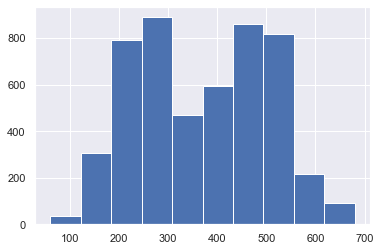

In [783]:
##### distribución de scores 

var_scr = [v for v in df_mt.columns if v[:6]=='score_']
var_scr

df_mt['total_score'] = df_mt[var_scr].sum(axis=1)
df_mt['total_score'].hist()

In [784]:
df_mt.total_score.describe()

count    5079.000000
mean      371.330577
std       131.838458
min        61.000000
25%       256.000000
50%       375.000000
75%       476.000000
max       680.000000
Name: total_score, dtype: float64

In [786]:
for v in X2.columns:    
    print(df_mt[['score_'+v[4:],v[2:]]].groupby(v[2:]).max())

          score_TOT_IQ
R_TOT_IQ              
( , 1)              95
[1,2)               74
[2,7)               20
[7, )               -6
                score_OPEN_ACC_ACT
R_OPEN_ACC_ACT                    
( , 1)                          46
[1,2)                           25
[2, 3)                          24
[3, )                           23
                   score_MAX_UTIL_OPEN_R
R_MAX_UTIL_OPEN_R                       
( , .1)                               41
[.1,.75)                              31
[.75,.95 )                            11
[.95, )                              -13
         score_EDAD
R_EDAD             
( , 41)         -19
[41,60)          36
[60,66)          71
[66, )          135
                       score_SUM_CUR_BAL_OPN_ALL
R_SUM_CUR_BAL_OPN_ALL                           
( , 1000)                                     66
[1000,7000)                                   14
[7000, )                                       9
                        score_TOT_RATIO_P

## gain chart

In [811]:
train_db = df_mt.iloc[2,]

# r = df2.iloc[(df1.Index.values + 0.5 
#        <= df2.Index.values[:, None]).argmax(axis=0)].reset_index(drop=1)
train_db.shape

(48,)

In [820]:
train_db = df_mt.iloc[list(X2t.index),]
validate_db = df_mt.iloc[list(X2v.index),]

print(train_db.shape)
print(validate_db.shape)

(3555, 48)
(1524, 48)


In [ ]:
# (3555, 11)
# (1524, 11)

### train

In [824]:
##score bins 

num_bins = 15
train_db['range_score'] = pd.qcut(train_db['total_score'],num_bins, duplicates = 'drop' ).astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [825]:

aux_scr = train_db[['range_score','TARGET']].copy()
aux_scr['n']= 1

aux_scr = aux_scr.pivot_table(index= 'range_score' , columns = 'TARGET' , aggfunc = 'count')

aux_scr.columns = aux_scr.columns.droplevel() 

aux_scr.reset_index()


aux_scr['buenos_acum'] = aux_scr[0].cumsum()
aux_scr['malos_acum'] = aux_scr[1].cumsum()

aux_scr['total'] = aux_scr[0]+aux_scr[1]

aux_scr['pct_buenos'] = aux_scr[0] /aux_scr[0].sum()
aux_scr['pct_malos']  = aux_scr[1] /aux_scr[1].sum()

aux_scr['pct_buenos_acum'] = aux_scr['buenos_acum'] /aux_scr[0].sum()
aux_scr['pct_malos_acum']  = aux_scr['malos_acum'] /aux_scr[1].sum()


aux_scr['pct_total'] =aux_scr['total'] /aux_scr['total'].sum()

aux_scr['odds'] =aux_scr[0] /aux_scr[1]

aux_scr['br'] =aux_scr[1] /aux_scr['total']

aux_scr['ks_aux'] = aux_scr['pct_buenos_acum'] - aux_scr['pct_malos_acum']

aux_scr


TARGET,0,1,buenos_acum,malos_acum,total,pct_buenos,pct_malos,pct_buenos_acum,pct_malos_acum,pct_total,odds,br,ks_aux
range_score,,,,,,,,,,,,,
"(186.0, 219.0]",138,107,138,107,245,0.051036,0.125734,0.051036,0.125734,0.068917,1.289720,0.436735,-0.074699
"(219.0, 238.0]",140,98,278,205,238,0.051775,0.115159,0.102811,0.240893,0.066948,1.428571,0.411765,-0.138082
"(238.0, 262.0]",138,89,416,294,227,0.051036,0.104583,0.153846,0.345476,0.063854,1.550562,0.392070,-0.191630
"(262.0, 284.667]",148,86,564,380,234,0.054734,0.101058,0.208580,0.446533,0.065823,1.720930,0.367521,-0.237954
"(284.667, 308.0]",167,72,731,452,239,0.061760,0.084606,0.270340,0.531140,0.067229,2.319444,0.301255,-0.260800
"(308.0, 348.0]",171,68,902,520,239,0.063240,0.079906,0.333580,0.611046,0.067229,2.514706,0.284519,-0.277466
"(348.0, 393.0]",187,50,1089,570,237,0.069157,0.058754,0.402737,0.669800,0.066667,3.740000,0.210970,-0.267064
"(393.0, 427.0]",190,45,1279,615,235,0.070266,0.052879,0.473003,0.722679,0.066104,4.222222,0.191489,-0.249676
"(427.0, 456.0]",300,48,1579,663,348,0.110947,0.056404,0.583950,0.779083,0.097890,6.250000,0.137931,-0.195134


In [826]:
ks = aux_scr['ks_aux'].min()
print(abs(ks))

0.277465946780328


In [827]:
aux_scr['r_score'] = aux_scr.index

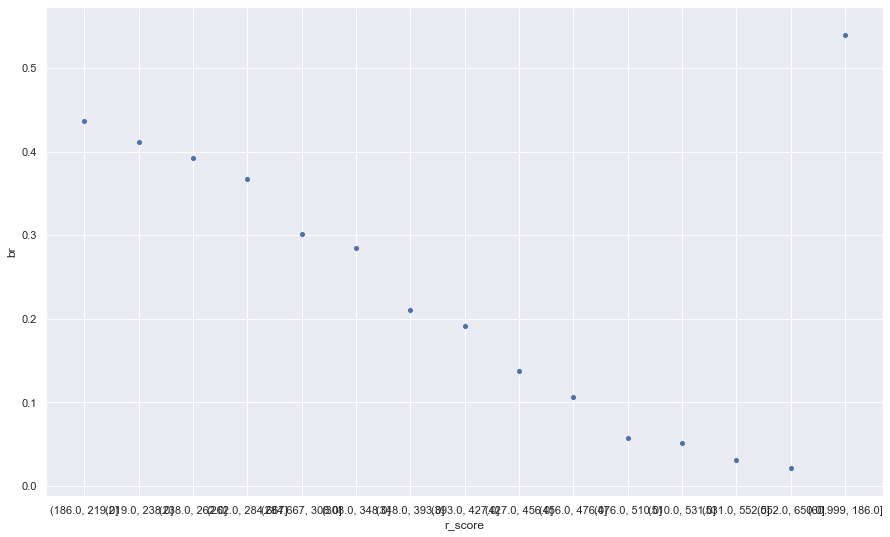

In [828]:
plt.figure(figsize = (15,9))
sns.scatterplot(x = 'r_score' , y = 'br' , data = aux_scr)

## validate

In [851]:
validate_db

,R_TOT_IQ,R_OPEN_ACC_ACT,R_MAX_UTIL_OPEN_R,R_EDAD,R_SUM_CUR_BAL_OPN_ALL,R_TOT_RATIO_PAYMENT_CL,R_OPEN_ACC_3M,R_MAX_MOP_6M_CL_OPN,R_MAX_MOP_6M,R_SUM_CUR_BAL_OPN_R,...,score_EDAD,score_SUM_CUR_BAL_OPN_ALL,score_TOT_RATIO_PAYMENT_CL,score_OPEN_ACC_3M,score_MAX_MOP_6M,score_OPEN_ACC_ACT_PL,score_SUM_CUR_BAL_OPN_PL,score_MAX_MOP_3M_I_OPN,total_score,range_score
4387,"[7, )","( , 1)","( , .1)","( , 41)","( , 1000)","( , .005)","( , 1)","( , 1)","[1,2)","( , 1400)",...,-19,66,71,48,29,14,49,36,375,"(348.0, 393.0]"
868,"[1,2)","[1,2)","[.75,.95 )","( , 41)","[1000,7000)","[.055, )","( , 1)","[1, )","[1,2)","[1400,8000)",...,-19,14,-4,48,29,14,49,36,277,"(262.0, 284.0]"
275,"[1,2)","[1,2)","[.1,.75)","[41,60)","[1000,7000)","[.055, )","[1, )","[1, )","[1,2)","[1400,8000)",...,36,14,-4,-7,29,14,49,36,297,"(284.0, 308.0]"
4450,"[1,2)","( , 1)","( , .1)","[60,66)","( , 1000)","( , .005)","( , 1)","( , 1)","[1,2)","( , 1400)",...,71,66,71,48,29,14,49,36,545,"(531.0, 552.0]"
2578,"( , 1)","( , 1)","( , .1)","[41,60)","( , 1000)","( , .005)","( , 1)","( , 1)","[2,3)","( , 1400)",...,36,66,71,48,18,14,49,36,520,"(510.0, 531.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,"[2,7)","[1,2)","( , .1)","( , 41)","[1000,7000)","[.055, )","[1, )","( , 1)","[2,3)","( , 1400)",...,-19,14,-4,-7,18,65,-15,21,159,"(60.99, 186.0]"
3849,"( , 1)","( , 1)","( , .1)","( , 41)","( , 1000)","( , .005)","( , 1)","( , 1)","( , 1)","( , 1400)",...,-19,66,71,48,49,14,49,36,496,"(476.0, 510.0]"
2532,"[2,7)","[1,2)","( , .1)","[41,60)","( , 1000)","( , .005)","( , 1)","( , 1)","( , 1)","( , 1400)",...,36,66,71,48,49,14,49,36,455,"(427.0, 456.0]"
2055,"( , 1)","( , 1)","( , .1)","[41,60)","( , 1000)","( , .005)","( , 1)","( , 1)","[1,2)","( , 1400)",...,36,66,71,48,29,14,49,36,531,"(510.0, 531.0]"


In [855]:

validate_db['range_score'] = np.select(
[
 validate_db.total_score  <=186.0
,validate_db.total_score  <=219.0
,validate_db.total_score  <=238.0
,validate_db.total_score  <=262.0
,validate_db.total_score  <=284.0
,validate_db.total_score  <=308.0
,validate_db.total_score  <=348.0
,validate_db.total_score  <=393.0
,validate_db.total_score  <=427.0
,validate_db.total_score  <=456.0
,validate_db.total_score  <=476.0
,validate_db.total_score  <=510.0
,validate_db.total_score  <=531.0
,validate_db.total_score  <=552.0
,validate_db.total_score  > 552.0  
]
,[
'(60.99, 186.0]'
,'(186.0, 219.0]'
,'(219.0, 238.0]'
,'(238.0, 262.0]'
,'(262.0, 284.0]'
,'(284.0, 308.0]'
,'(308.0, 348.0]'
,'(348.0, 393.0]'
,'(393.0, 427.0]'
,'(427.0, 456.0]'
,'(456.0, 476.0]'
,'(476.0, 510.0]'
,'(510.0, 531.0]'
,'(531.0, 552.0]'
,'(552.0, 650.0]'  
])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [856]:

aux_scr = validate_db[['range_score','TARGET']].copy()
aux_scr['n']= 1

aux_scr = aux_scr.pivot_table(index= 'range_score' , columns = 'TARGET' , aggfunc = 'count')

aux_scr.columns = aux_scr.columns.droplevel() 

aux_scr.reset_index()


aux_scr['buenos_acum'] = aux_scr[0].cumsum()
aux_scr['malos_acum'] = aux_scr[1].cumsum()

aux_scr['total'] = aux_scr[0]+aux_scr[1]

aux_scr['pct_buenos'] = aux_scr[0] /aux_scr[0].sum()
aux_scr['pct_malos']  = aux_scr[1] /aux_scr[1].sum()

aux_scr['pct_buenos_acum'] = aux_scr['buenos_acum'] /aux_scr[0].sum()
aux_scr['pct_malos_acum']  = aux_scr['malos_acum'] /aux_scr[1].sum()


aux_scr['pct_total'] =aux_scr['total'] /aux_scr['total'].sum()

aux_scr['odds'] =aux_scr[0] /aux_scr[1]

aux_scr['br'] =aux_scr[1] /aux_scr['total']

aux_scr['ks_aux'] = aux_scr['pct_buenos_acum'] - aux_scr['pct_malos_acum']

aux_scr

TARGET,0,1,buenos_acum,malos_acum,total,pct_buenos,pct_malos,pct_buenos_acum,pct_malos_acum,pct_total,odds,br,ks_aux
range_score,,,,,,,,,,,,,
"(186.0, 219.0]",65,55,65,55,120,0.055556,0.155367,0.055556,0.155367,0.078740,1.181818,0.458333,-0.099812
"(219.0, 238.0]",48,38,113,93,86,0.041026,0.107345,0.096581,0.262712,0.056430,1.263158,0.441860,-0.166131
"(238.0, 262.0]",48,35,161,128,83,0.041026,0.098870,0.137607,0.361582,0.054462,1.371429,0.421687,-0.223975
"(262.0, 284.0]",67,35,228,163,102,0.057265,0.098870,0.194872,0.460452,0.066929,1.914286,0.343137,-0.265580
"(284.0, 308.0]",80,20,308,183,100,0.068376,0.056497,0.263248,0.516949,0.065617,4.000000,0.200000,-0.253701
"(308.0, 348.0]",77,22,385,205,99,0.065812,0.062147,0.329060,0.579096,0.064961,3.500000,0.222222,-0.250036
"(348.0, 393.0]",66,24,451,229,90,0.056410,0.067797,0.385470,0.646893,0.059055,2.750000,0.266667,-0.261423
"(393.0, 427.0]",93,18,544,247,111,0.079487,0.050847,0.464957,0.697740,0.072835,5.166667,0.162162,-0.232783
"(427.0, 456.0]",123,21,667,268,144,0.105128,0.059322,0.570085,0.757062,0.094488,5.857143,0.145833,-0.186977


In [857]:
ks = aux_scr['ks_aux'].min()
print(abs(ks))

0.265580182529335


In [858]:
aux_scr['r_score'] = aux_scr.index

In [15]:
plt.figure(figsize = (15,9), xticks = 90)
sns.scatterplot(x = 'r_score' , y = 'br' , data = aux_scr)

TypeError: __init__() got an unexpected keyword argument 'xticks'